## Introduction to Machine Learning Implementation with PyTorch

*Most of the basic ideas are from [모두를 위한 머신러닝/딥러닝 강의](http://hunkim.github.io/ml/). All implementations posted can only be used for educational purposes with references to the original author, Sangjun Park. MS, Korea University, College of Medicine*

### Brief overview of PyTorch

PyTorch is an open-source python package explicitly developed for advanced research and application on deep learning. Pros when compared to Tensorflow are wide accessibility, intuitiveness of design, and __extreme dynamicity__ (which is the most fundamental difference between the two modules) when dealing with computation graphs. The only disadvantage regarding PyTorch is that compared to its superiority, it is still relatively a more recent product than Tensorflow, which makes it harder to gain much attention in most corporate settings. However, it is certain that the current paradigm is being shifted towards what we will discuss further, as more and more researchers are applying PyTorch as the main source of their works.

Installation, basic concepts and syntax documentations can be found at the [official pytorch website](https://pytorch.org/).

### Linear Regression

#### Single-variable Linear Regression

The mathematical model for single-variable linear regression is as follows.

$$y = \beta_{0} + \beta_{1}x$$

We call $\beta_{1}$ as the regression coefficient or the slope, and $\beta_{0}$ as the intercept. This model is also called simple linear regression.

Let us first examine the exact solution using the least squares method. The method of least squares states that the sum of squares between the actual value and the fitted value, should be minimum. Using formal notations, minimization of $$(\underset{\text{Fitted value}}{\hat{y}} - \underset{\text{Actual value}}{y})^2$$ is the goal of this model.

The exact solution to this problem is the following whose derivations will be omitted. $$\beta_{1} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}\; \text{($\bar{x}$ and $\bar{y}$ are the mean values of x and y)}\\\beta_{0} = \bar{y} - \beta_{1}\bar{x}$$

For this example, we will use the following data. $$x = \begin{bmatrix}1.05&1.54&2.01&2.55&3.13&3.45&4.02&4.65&5.34&5.50\end{bmatrix}^{T}$$ $$y = \begin{bmatrix}10.3&15.4&21.2&25.4&30.1&35.6&40.5&43.4&50.1&56.6\end{bmatrix}^{T}$$

0.7824239351471718 9.650293641652478


Text(4, 30, '$y = 0.78 + 9.65x$')

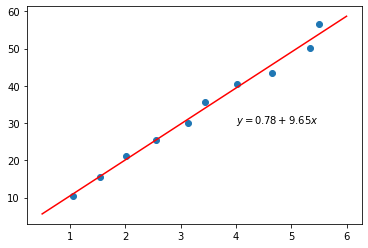

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1.05, 1.54, 2.01, 2.55, 3.13, 3.45, 4.02, 4.65, 5.34, 5.50])
y = np.array([10.3, 15.4, 21.2, 25.4, 30.1, 35.6, 40.5, 43.4, 50.1, 56.6])

b1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
b0 = np.mean(y) - b1 * np.mean(x)

x_range = np.linspace(0.5, 6.0, 1000)
y_hat = b0 + b1 * x_range

print(b0, b1)

plt.scatter(x, y)
plt.plot(x_range, y_hat, 'r')
plt.text(4, 30, "$y = 0.78 + 9.65x$")

Next, let's use the gradient descent method using PyTorch.

In [114]:
import torch
from torch.autograd import Variable

class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize, bias = True)

    def forward(self, x):
        out = self.linear(x)
        return out
    
inputDim = 1
outputDim = 1
learningRate = 0.001 
epochs = 10000

model = linearRegression(inputDim, outputDim)
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

x_torch = torch.from_numpy(x).float().unsqueeze(dim=1)
y_torch = torch.from_numpy(y).float().unsqueeze(dim=1)

epoch_graph = np.array([])
loss_graph = np.array([])

for epoch in range(epochs):
    
    inputs = x_torch
    labels = y_torch

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cumulate gradients
    optimizer.zero_grad()

    # get output from the model with given inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    
    # get gradients with respect to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))
    
    epoch_graph = np.append(epoch_graph, epoch)
    loss_graph = np.append(loss_graph, loss.item())

tensor(1345.6559, grad_fn=<MseLossBackward>)
epoch 0, loss 1345.6558837890625
tensor(1271.1686, grad_fn=<MseLossBackward>)
epoch 1, loss 1271.1685791015625
tensor(1200.8149, grad_fn=<MseLossBackward>)
epoch 2, loss 1200.81494140625
tensor(1134.3655, grad_fn=<MseLossBackward>)
epoch 3, loss 1134.365478515625
tensor(1071.6035, grad_fn=<MseLossBackward>)
epoch 4, loss 1071.603515625
tensor(1012.3246, grad_fn=<MseLossBackward>)
epoch 5, loss 1012.3245849609375
tensor(956.3353, grad_fn=<MseLossBackward>)
epoch 6, loss 956.3352661132812
tensor(903.4530, grad_fn=<MseLossBackward>)
epoch 7, loss 903.4530029296875
tensor(853.5055, grad_fn=<MseLossBackward>)
epoch 8, loss 853.5054931640625
tensor(806.3297, grad_fn=<MseLossBackward>)
epoch 9, loss 806.3297119140625
tensor(761.7719, grad_fn=<MseLossBackward>)
epoch 10, loss 761.7718505859375
tensor(719.6867, grad_fn=<MseLossBackward>)
epoch 11, loss 719.6867065429688
tensor(679.9370, grad_fn=<MseLossBackward>)
epoch 12, loss 679.93701171875
tensor

epoch 312, loss 3.230712890625
tensor(3.2301, grad_fn=<MseLossBackward>)
epoch 313, loss 3.2301342487335205
tensor(3.2296, grad_fn=<MseLossBackward>)
epoch 314, loss 3.229553699493408
tensor(3.2290, grad_fn=<MseLossBackward>)
epoch 315, loss 3.228973388671875
tensor(3.2284, grad_fn=<MseLossBackward>)
epoch 316, loss 3.228397846221924
tensor(3.2278, grad_fn=<MseLossBackward>)
epoch 317, loss 3.227818727493286
tensor(3.2272, grad_fn=<MseLossBackward>)
epoch 318, loss 3.2272396087646484
tensor(3.2267, grad_fn=<MseLossBackward>)
epoch 319, loss 3.2266604900360107
tensor(3.2261, grad_fn=<MseLossBackward>)
epoch 320, loss 3.226083278656006
tensor(3.2255, grad_fn=<MseLossBackward>)
epoch 321, loss 3.225505828857422
tensor(3.2249, grad_fn=<MseLossBackward>)
epoch 322, loss 3.2249321937561035
tensor(3.2244, grad_fn=<MseLossBackward>)
epoch 323, loss 3.2243568897247314
tensor(3.2238, grad_fn=<MseLossBackward>)
epoch 324, loss 3.2237801551818848
tensor(3.2232, grad_fn=<MseLossBackward>)
epoch 325

tensor(3.0678, grad_fn=<MseLossBackward>)
epoch 621, loss 3.0678324699401855
tensor(3.0674, grad_fn=<MseLossBackward>)
epoch 622, loss 3.067354202270508
tensor(3.0669, grad_fn=<MseLossBackward>)
epoch 623, loss 3.0668766498565674
tensor(3.0664, grad_fn=<MseLossBackward>)
epoch 624, loss 3.0664005279541016
tensor(3.0659, grad_fn=<MseLossBackward>)
epoch 625, loss 3.065922975540161
tensor(3.0654, grad_fn=<MseLossBackward>)
epoch 626, loss 3.0654468536376953
tensor(3.0650, grad_fn=<MseLossBackward>)
epoch 627, loss 3.064969301223755
tensor(3.0645, grad_fn=<MseLossBackward>)
epoch 628, loss 3.0644898414611816
tensor(3.0640, grad_fn=<MseLossBackward>)
epoch 629, loss 3.064018726348877
tensor(3.0635, grad_fn=<MseLossBackward>)
epoch 630, loss 3.0635414123535156
tensor(3.0631, grad_fn=<MseLossBackward>)
epoch 631, loss 3.063066244125366
tensor(3.0626, grad_fn=<MseLossBackward>)
epoch 632, loss 3.0625922679901123
tensor(3.0621, grad_fn=<MseLossBackward>)
epoch 633, loss 3.0621156692504883
tens

tensor(2.9259, grad_fn=<MseLossBackward>)
epoch 949, loss 2.9258720874786377
tensor(2.9255, grad_fn=<MseLossBackward>)
epoch 950, loss 2.9254798889160156
tensor(2.9251, grad_fn=<MseLossBackward>)
epoch 951, loss 2.9250903129577637
tensor(2.9247, grad_fn=<MseLossBackward>)
epoch 952, loss 2.9247021675109863
tensor(2.9243, grad_fn=<MseLossBackward>)
epoch 953, loss 2.9243102073669434
tensor(2.9239, grad_fn=<MseLossBackward>)
epoch 954, loss 2.9239203929901123
tensor(2.9235, grad_fn=<MseLossBackward>)
epoch 955, loss 2.923534393310547
tensor(2.9231, grad_fn=<MseLossBackward>)
epoch 956, loss 2.9231438636779785
tensor(2.9228, grad_fn=<MseLossBackward>)
epoch 957, loss 2.922757148742676
tensor(2.9224, grad_fn=<MseLossBackward>)
epoch 958, loss 2.9223685264587402
tensor(2.9220, grad_fn=<MseLossBackward>)
epoch 959, loss 2.92197847366333
tensor(2.9216, grad_fn=<MseLossBackward>)
epoch 960, loss 2.9215922355651855
tensor(2.9212, grad_fn=<MseLossBackward>)
epoch 961, loss 2.921201229095459
tens

tensor(2.8193, grad_fn=<MseLossBackward>)
epoch 1248, loss 2.819319725036621
tensor(2.8190, grad_fn=<MseLossBackward>)
epoch 1249, loss 2.8189969062805176
tensor(2.8187, grad_fn=<MseLossBackward>)
epoch 1250, loss 2.8186731338500977
tensor(2.8184, grad_fn=<MseLossBackward>)
epoch 1251, loss 2.818350076675415
tensor(2.8180, grad_fn=<MseLossBackward>)
epoch 1252, loss 2.8180267810821533
tensor(2.8177, grad_fn=<MseLossBackward>)
epoch 1253, loss 2.817700147628784
tensor(2.8174, grad_fn=<MseLossBackward>)
epoch 1254, loss 2.817378044128418
tensor(2.8171, grad_fn=<MseLossBackward>)
epoch 1255, loss 2.8170535564422607
tensor(2.8167, grad_fn=<MseLossBackward>)
epoch 1256, loss 2.816732168197632
tensor(2.8164, grad_fn=<MseLossBackward>)
epoch 1257, loss 2.816410541534424
tensor(2.8161, grad_fn=<MseLossBackward>)
epoch 1258, loss 2.816087007522583
tensor(2.8158, grad_fn=<MseLossBackward>)
epoch 1259, loss 2.8157637119293213
tensor(2.8154, grad_fn=<MseLossBackward>)
epoch 1260, loss 2.8154425621

tensor(2.7167, grad_fn=<MseLossBackward>)
epoch 1600, loss 2.716719150543213
tensor(2.7165, grad_fn=<MseLossBackward>)
epoch 1601, loss 2.716459035873413
tensor(2.7162, grad_fn=<MseLossBackward>)
epoch 1602, loss 2.7161998748779297
tensor(2.7159, grad_fn=<MseLossBackward>)
epoch 1603, loss 2.7159366607666016
tensor(2.7157, grad_fn=<MseLossBackward>)
epoch 1604, loss 2.715676784515381
tensor(2.7154, grad_fn=<MseLossBackward>)
epoch 1605, loss 2.715416431427002
tensor(2.7152, grad_fn=<MseLossBackward>)
epoch 1606, loss 2.715158462524414
tensor(2.7149, grad_fn=<MseLossBackward>)
epoch 1607, loss 2.7148959636688232
tensor(2.7146, grad_fn=<MseLossBackward>)
epoch 1608, loss 2.7146389484405518
tensor(2.7144, grad_fn=<MseLossBackward>)
epoch 1609, loss 2.7143771648406982
tensor(2.7141, grad_fn=<MseLossBackward>)
epoch 1610, loss 2.7141194343566895
tensor(2.7139, grad_fn=<MseLossBackward>)
epoch 1611, loss 2.7138590812683105
tensor(2.7136, grad_fn=<MseLossBackward>)
epoch 1612, loss 2.71360158

epoch 1853, loss 2.6556265354156494
tensor(2.6554, grad_fn=<MseLossBackward>)
epoch 1854, loss 2.6554036140441895
tensor(2.6552, grad_fn=<MseLossBackward>)
epoch 1855, loss 2.655183792114258
tensor(2.6550, grad_fn=<MseLossBackward>)
epoch 1856, loss 2.654958724975586
tensor(2.6547, grad_fn=<MseLossBackward>)
epoch 1857, loss 2.6547343730926514
tensor(2.6545, grad_fn=<MseLossBackward>)
epoch 1858, loss 2.6545138359069824
tensor(2.6543, grad_fn=<MseLossBackward>)
epoch 1859, loss 2.654292345046997
tensor(2.6541, grad_fn=<MseLossBackward>)
epoch 1860, loss 2.654068946838379
tensor(2.6538, grad_fn=<MseLossBackward>)
epoch 1861, loss 2.6538474559783936
tensor(2.6536, grad_fn=<MseLossBackward>)
epoch 1862, loss 2.65362286567688
tensor(2.6534, grad_fn=<MseLossBackward>)
epoch 1863, loss 2.6534037590026855
tensor(2.6532, grad_fn=<MseLossBackward>)
epoch 1864, loss 2.6531805992126465
tensor(2.6530, grad_fn=<MseLossBackward>)
epoch 1865, loss 2.6529593467712402
tensor(2.6527, grad_fn=<MseLossBac

epoch 2186, loss 2.588503360748291
tensor(2.5883, grad_fn=<MseLossBackward>)
epoch 2187, loss 2.5883231163024902
tensor(2.5881, grad_fn=<MseLossBackward>)
epoch 2188, loss 2.5881428718566895
tensor(2.5880, grad_fn=<MseLossBackward>)
epoch 2189, loss 2.5879616737365723
tensor(2.5878, grad_fn=<MseLossBackward>)
epoch 2190, loss 2.587780714035034
tensor(2.5876, grad_fn=<MseLossBackward>)
epoch 2191, loss 2.5876007080078125
tensor(2.5874, grad_fn=<MseLossBackward>)
epoch 2192, loss 2.5874195098876953
tensor(2.5872, grad_fn=<MseLossBackward>)
epoch 2193, loss 2.5872364044189453
tensor(2.5871, grad_fn=<MseLossBackward>)
epoch 2194, loss 2.5870554447174072
tensor(2.5869, grad_fn=<MseLossBackward>)
epoch 2195, loss 2.5868754386901855
tensor(2.5867, grad_fn=<MseLossBackward>)
epoch 2196, loss 2.586697816848755
tensor(2.5865, grad_fn=<MseLossBackward>)
epoch 2197, loss 2.5865156650543213
tensor(2.5863, grad_fn=<MseLossBackward>)
epoch 2198, loss 2.586336135864258
tensor(2.5862, grad_fn=<MseLossB

tensor(2.5285, grad_fn=<MseLossBackward>)
epoch 2556, loss 2.528486728668213
tensor(2.5283, grad_fn=<MseLossBackward>)
epoch 2557, loss 2.5283405780792236
tensor(2.5282, grad_fn=<MseLossBackward>)
epoch 2558, loss 2.528196096420288
tensor(2.5281, grad_fn=<MseLossBackward>)
epoch 2559, loss 2.528052568435669
tensor(2.5279, grad_fn=<MseLossBackward>)
epoch 2560, loss 2.52790904045105
tensor(2.5278, grad_fn=<MseLossBackward>)
epoch 2561, loss 2.5277645587921143
tensor(2.5276, grad_fn=<MseLossBackward>)
epoch 2562, loss 2.527623414993286
tensor(2.5275, grad_fn=<MseLossBackward>)
epoch 2563, loss 2.527479648590088
tensor(2.5273, grad_fn=<MseLossBackward>)
epoch 2564, loss 2.527334690093994
tensor(2.5272, grad_fn=<MseLossBackward>)
epoch 2565, loss 2.527189254760742
tensor(2.5270, grad_fn=<MseLossBackward>)
epoch 2566, loss 2.5270442962646484
tensor(2.5269, grad_fn=<MseLossBackward>)
epoch 2567, loss 2.526902675628662
tensor(2.5268, grad_fn=<MseLossBackward>)
epoch 2568, loss 2.5267605781555

epoch 2885, loss 2.4855175018310547
tensor(2.4854, grad_fn=<MseLossBackward>)
epoch 2886, loss 2.485403537750244
tensor(2.4853, grad_fn=<MseLossBackward>)
epoch 2887, loss 2.485285758972168
tensor(2.4852, grad_fn=<MseLossBackward>)
epoch 2888, loss 2.485166072845459
tensor(2.4850, grad_fn=<MseLossBackward>)
epoch 2889, loss 2.485048770904541
tensor(2.4849, grad_fn=<MseLossBackward>)
epoch 2890, loss 2.4849305152893066
tensor(2.4848, grad_fn=<MseLossBackward>)
epoch 2891, loss 2.4848134517669678
tensor(2.4847, grad_fn=<MseLossBackward>)
epoch 2892, loss 2.4846973419189453
tensor(2.4846, grad_fn=<MseLossBackward>)
epoch 2893, loss 2.4845809936523438
tensor(2.4845, grad_fn=<MseLossBackward>)
epoch 2894, loss 2.4844634532928467
tensor(2.4843, grad_fn=<MseLossBackward>)
epoch 2895, loss 2.4843459129333496
tensor(2.4842, grad_fn=<MseLossBackward>)
epoch 2896, loss 2.484229564666748
tensor(2.4841, grad_fn=<MseLossBackward>)
epoch 2897, loss 2.484112501144409
tensor(2.4840, grad_fn=<MseLossBac

epoch 3225, loss 2.449418544769287
tensor(2.4493, grad_fn=<MseLossBackward>)
epoch 3226, loss 2.4493231773376465
tensor(2.4492, grad_fn=<MseLossBackward>)
epoch 3227, loss 2.4492273330688477
tensor(2.4491, grad_fn=<MseLossBackward>)
epoch 3228, loss 2.449131727218628
tensor(2.4490, grad_fn=<MseLossBackward>)
epoch 3229, loss 2.44903826713562
tensor(2.4489, grad_fn=<MseLossBackward>)
epoch 3230, loss 2.448941946029663
tensor(2.4488, grad_fn=<MseLossBackward>)
epoch 3231, loss 2.4488472938537598
tensor(2.4488, grad_fn=<MseLossBackward>)
epoch 3232, loss 2.448751449584961
tensor(2.4487, grad_fn=<MseLossBackward>)
epoch 3233, loss 2.448657274246216
tensor(2.4486, grad_fn=<MseLossBackward>)
epoch 3234, loss 2.4485621452331543
tensor(2.4485, grad_fn=<MseLossBackward>)
epoch 3235, loss 2.448467969894409
tensor(2.4484, grad_fn=<MseLossBackward>)
epoch 3236, loss 2.4483718872070312
tensor(2.4483, grad_fn=<MseLossBackward>)
epoch 3237, loss 2.448276996612549
tensor(2.4482, grad_fn=<MseLossBackwa

tensor(2.4183, grad_fn=<MseLossBackward>)
epoch 3589, loss 2.418327808380127
tensor(2.4182, grad_fn=<MseLossBackward>)
epoch 3590, loss 2.4182496070861816
tensor(2.4182, grad_fn=<MseLossBackward>)
epoch 3591, loss 2.418173313140869
tensor(2.4181, grad_fn=<MseLossBackward>)
epoch 3592, loss 2.4180986881256104
tensor(2.4180, grad_fn=<MseLossBackward>)
epoch 3593, loss 2.418022632598877
tensor(2.4179, grad_fn=<MseLossBackward>)
epoch 3594, loss 2.4179482460021973
tensor(2.4179, grad_fn=<MseLossBackward>)
epoch 3595, loss 2.417872905731201
tensor(2.4178, grad_fn=<MseLossBackward>)
epoch 3596, loss 2.417792797088623
tensor(2.4177, grad_fn=<MseLossBackward>)
epoch 3597, loss 2.417719841003418
tensor(2.4176, grad_fn=<MseLossBackward>)
epoch 3598, loss 2.4176440238952637
tensor(2.4176, grad_fn=<MseLossBackward>)
epoch 3599, loss 2.4175660610198975
tensor(2.4175, grad_fn=<MseLossBackward>)
epoch 3600, loss 2.4174933433532715
tensor(2.4174, grad_fn=<MseLossBackward>)
epoch 3601, loss 2.417415618

epoch 3939, loss 2.394364595413208
tensor(2.3943, grad_fn=<MseLossBackward>)
epoch 3940, loss 2.3943030834198
tensor(2.3942, grad_fn=<MseLossBackward>)
epoch 3941, loss 2.394237995147705
tensor(2.3942, grad_fn=<MseLossBackward>)
epoch 3942, loss 2.3941810131073
tensor(2.3941, grad_fn=<MseLossBackward>)
epoch 3943, loss 2.394118547439575
tensor(2.3941, grad_fn=<MseLossBackward>)
epoch 3944, loss 2.394057512283325
tensor(2.3940, grad_fn=<MseLossBackward>)
epoch 3945, loss 2.3939971923828125
tensor(2.3939, grad_fn=<MseLossBackward>)
epoch 3946, loss 2.3939359188079834
tensor(2.3939, grad_fn=<MseLossBackward>)
epoch 3947, loss 2.3938746452331543
tensor(2.3938, grad_fn=<MseLossBackward>)
epoch 3948, loss 2.393815040588379
tensor(2.3938, grad_fn=<MseLossBackward>)
epoch 3949, loss 2.393751621246338
tensor(2.3937, grad_fn=<MseLossBackward>)
epoch 3950, loss 2.3936917781829834
tensor(2.3936, grad_fn=<MseLossBackward>)
epoch 3951, loss 2.3936307430267334
tensor(2.3936, grad_fn=<MseLossBackward>

tensor(2.3737, grad_fn=<MseLossBackward>)
epoch 4316, loss 2.373744487762451
tensor(2.3737, grad_fn=<MseLossBackward>)
epoch 4317, loss 2.3736987113952637
tensor(2.3736, grad_fn=<MseLossBackward>)
epoch 4318, loss 2.3736491203308105
tensor(2.3736, grad_fn=<MseLossBackward>)
epoch 4319, loss 2.3736014366149902
tensor(2.3736, grad_fn=<MseLossBackward>)
epoch 4320, loss 2.373551607131958
tensor(2.3735, grad_fn=<MseLossBackward>)
epoch 4321, loss 2.3735032081604004
tensor(2.3735, grad_fn=<MseLossBackward>)
epoch 4322, loss 2.373455762863159
tensor(2.3734, grad_fn=<MseLossBackward>)
epoch 4323, loss 2.3734054565429688
tensor(2.3734, grad_fn=<MseLossBackward>)
epoch 4324, loss 2.3733584880828857
tensor(2.3733, grad_fn=<MseLossBackward>)
epoch 4325, loss 2.3733110427856445
tensor(2.3733, grad_fn=<MseLossBackward>)
epoch 4326, loss 2.3732612133026123
tensor(2.3732, grad_fn=<MseLossBackward>)
epoch 4327, loss 2.3732142448425293
tensor(2.3732, grad_fn=<MseLossBackward>)
epoch 4328, loss 2.373167

epoch 4633, loss 2.3597702980041504
tensor(2.3597, grad_fn=<MseLossBackward>)
epoch 4634, loss 2.3597309589385986
tensor(2.3597, grad_fn=<MseLossBackward>)
epoch 4635, loss 2.3596901893615723
tensor(2.3597, grad_fn=<MseLossBackward>)
epoch 4636, loss 2.3596510887145996
tensor(2.3596, grad_fn=<MseLossBackward>)
epoch 4637, loss 2.3596110343933105
tensor(2.3596, grad_fn=<MseLossBackward>)
epoch 4638, loss 2.359572649002075
tensor(2.3595, grad_fn=<MseLossBackward>)
epoch 4639, loss 2.359531879425049
tensor(2.3595, grad_fn=<MseLossBackward>)
epoch 4640, loss 2.359492063522339
tensor(2.3595, grad_fn=<MseLossBackward>)
epoch 4641, loss 2.359454393386841
tensor(2.3594, grad_fn=<MseLossBackward>)
epoch 4642, loss 2.359412431716919
tensor(2.3594, grad_fn=<MseLossBackward>)
epoch 4643, loss 2.359373092651367
tensor(2.3593, grad_fn=<MseLossBackward>)
epoch 4644, loss 2.3593335151672363
tensor(2.3593, grad_fn=<MseLossBackward>)
epoch 4645, loss 2.359294891357422
tensor(2.3593, grad_fn=<MseLossBack

epoch 4978, loss 2.3473753929138184
tensor(2.3473, grad_fn=<MseLossBackward>)
epoch 4979, loss 2.3473427295684814
tensor(2.3473, grad_fn=<MseLossBackward>)
epoch 4980, loss 2.347310781478882
tensor(2.3473, grad_fn=<MseLossBackward>)
epoch 4981, loss 2.3472769260406494
tensor(2.3472, grad_fn=<MseLossBackward>)
epoch 4982, loss 2.34724760055542
tensor(2.3472, grad_fn=<MseLossBackward>)
epoch 4983, loss 2.3472111225128174
tensor(2.3472, grad_fn=<MseLossBackward>)
epoch 4984, loss 2.3471832275390625
tensor(2.3472, grad_fn=<MseLossBackward>)
epoch 4985, loss 2.347151041030884
tensor(2.3471, grad_fn=<MseLossBackward>)
epoch 4986, loss 2.3471179008483887
tensor(2.3471, grad_fn=<MseLossBackward>)
epoch 4987, loss 2.3470871448516846
tensor(2.3471, grad_fn=<MseLossBackward>)
epoch 4988, loss 2.3470523357391357
tensor(2.3470, grad_fn=<MseLossBackward>)
epoch 4989, loss 2.347022294998169
tensor(2.3470, grad_fn=<MseLossBackward>)
epoch 4990, loss 2.3469884395599365
tensor(2.3470, grad_fn=<MseLossBa

tensor(2.3372, grad_fn=<MseLossBackward>)
epoch 5329, loss 2.337207317352295
tensor(2.3372, grad_fn=<MseLossBackward>)
epoch 5330, loss 2.33718204498291
tensor(2.3372, grad_fn=<MseLossBackward>)
epoch 5331, loss 2.337155818939209
tensor(2.3371, grad_fn=<MseLossBackward>)
epoch 5332, loss 2.337130308151245
tensor(2.3371, grad_fn=<MseLossBackward>)
epoch 5333, loss 2.3371033668518066
tensor(2.3371, grad_fn=<MseLossBackward>)
epoch 5334, loss 2.3370776176452637
tensor(2.3371, grad_fn=<MseLossBackward>)
epoch 5335, loss 2.3370509147644043
tensor(2.3370, grad_fn=<MseLossBackward>)
epoch 5336, loss 2.3370258808135986
tensor(2.3370, grad_fn=<MseLossBackward>)
epoch 5337, loss 2.337001323699951
tensor(2.3370, grad_fn=<MseLossBackward>)
epoch 5338, loss 2.336972713470459
tensor(2.3369, grad_fn=<MseLossBackward>)
epoch 5339, loss 2.3369483947753906
tensor(2.3369, grad_fn=<MseLossBackward>)
epoch 5340, loss 2.3369240760803223
tensor(2.3369, grad_fn=<MseLossBackward>)
epoch 5341, loss 2.3368973731

epoch 5692, loss 2.3287770748138428
tensor(2.3288, grad_fn=<MseLossBackward>)
epoch 5693, loss 2.3287551403045654
tensor(2.3287, grad_fn=<MseLossBackward>)
epoch 5694, loss 2.328735828399658
tensor(2.3287, grad_fn=<MseLossBackward>)
epoch 5695, loss 2.328713893890381
tensor(2.3287, grad_fn=<MseLossBackward>)
epoch 5696, loss 2.328692674636841
tensor(2.3287, grad_fn=<MseLossBackward>)
epoch 5697, loss 2.328671932220459
tensor(2.3287, grad_fn=<MseLossBackward>)
epoch 5698, loss 2.328650951385498
tensor(2.3286, grad_fn=<MseLossBackward>)
epoch 5699, loss 2.3286330699920654
tensor(2.3286, grad_fn=<MseLossBackward>)
epoch 5700, loss 2.3286120891571045
tensor(2.3286, grad_fn=<MseLossBackward>)
epoch 5701, loss 2.3285903930664062
tensor(2.3286, grad_fn=<MseLossBackward>)
epoch 5702, loss 2.3285701274871826
tensor(2.3285, grad_fn=<MseLossBackward>)
epoch 5703, loss 2.3285491466522217
tensor(2.3285, grad_fn=<MseLossBackward>)
epoch 5704, loss 2.3285281658172607
tensor(2.3285, grad_fn=<MseLossBa

tensor(2.3230, grad_fn=<MseLossBackward>)
epoch 5998, loss 2.32300066947937
tensor(2.3230, grad_fn=<MseLossBackward>)
epoch 5999, loss 2.3229823112487793
tensor(2.3230, grad_fn=<MseLossBackward>)
epoch 6000, loss 2.322967052459717
tensor(2.3230, grad_fn=<MseLossBackward>)
epoch 6001, loss 2.322951078414917
tensor(2.3229, grad_fn=<MseLossBackward>)
epoch 6002, loss 2.3229315280914307
tensor(2.3229, grad_fn=<MseLossBackward>)
epoch 6003, loss 2.322918176651001
tensor(2.3229, grad_fn=<MseLossBackward>)
epoch 6004, loss 2.322899580001831
tensor(2.3229, grad_fn=<MseLossBackward>)
epoch 6005, loss 2.3228812217712402
tensor(2.3229, grad_fn=<MseLossBackward>)
epoch 6006, loss 2.3228652477264404
tensor(2.3228, grad_fn=<MseLossBackward>)
epoch 6007, loss 2.3228466510772705
tensor(2.3228, grad_fn=<MseLossBackward>)
epoch 6008, loss 2.322833299636841
tensor(2.3228, grad_fn=<MseLossBackward>)
epoch 6009, loss 2.3228135108947754
tensor(2.3228, grad_fn=<MseLossBackward>)
epoch 6010, loss 2.3227970600

epoch 6373, loss 2.3172640800476074
tensor(2.3173, grad_fn=<MseLossBackward>)
epoch 6374, loss 2.317251682281494
tensor(2.3172, grad_fn=<MseLossBackward>)
epoch 6375, loss 2.317239284515381
tensor(2.3172, grad_fn=<MseLossBackward>)
epoch 6376, loss 2.317223310470581
tensor(2.3172, grad_fn=<MseLossBackward>)
epoch 6377, loss 2.317211151123047
tensor(2.3172, grad_fn=<MseLossBackward>)
epoch 6378, loss 2.317197799682617
tensor(2.3172, grad_fn=<MseLossBackward>)
epoch 6379, loss 2.317185163497925
tensor(2.3172, grad_fn=<MseLossBackward>)
epoch 6380, loss 2.3171706199645996
tensor(2.3172, grad_fn=<MseLossBackward>)
epoch 6381, loss 2.3171546459198
tensor(2.3171, grad_fn=<MseLossBackward>)
epoch 6382, loss 2.317143440246582
tensor(2.3171, grad_fn=<MseLossBackward>)
epoch 6383, loss 2.3171303272247314
tensor(2.3171, grad_fn=<MseLossBackward>)
epoch 6384, loss 2.317115545272827
tensor(2.3171, grad_fn=<MseLossBackward>)
epoch 6385, loss 2.3171024322509766
tensor(2.3171, grad_fn=<MseLossBackward

epoch 6719, loss 2.31303071975708
tensor(2.3130, grad_fn=<MseLossBackward>)
epoch 6720, loss 2.313021659851074
tensor(2.3130, grad_fn=<MseLossBackward>)
epoch 6721, loss 2.3130099773406982
tensor(2.3130, grad_fn=<MseLossBackward>)
epoch 6722, loss 2.3129987716674805
tensor(2.3130, grad_fn=<MseLossBackward>)
epoch 6723, loss 2.312990665435791
tensor(2.3130, grad_fn=<MseLossBackward>)
epoch 6724, loss 2.312979221343994
tensor(2.3130, grad_fn=<MseLossBackward>)
epoch 6725, loss 2.312969207763672
tensor(2.3130, grad_fn=<MseLossBackward>)
epoch 6726, loss 2.312957286834717
tensor(2.3129, grad_fn=<MseLossBackward>)
epoch 6727, loss 2.3129467964172363
tensor(2.3129, grad_fn=<MseLossBackward>)
epoch 6728, loss 2.3129351139068604
tensor(2.3129, grad_fn=<MseLossBackward>)
epoch 6729, loss 2.3129234313964844
tensor(2.3129, grad_fn=<MseLossBackward>)
epoch 6730, loss 2.3129143714904785
tensor(2.3129, grad_fn=<MseLossBackward>)
epoch 6731, loss 2.3129024505615234
tensor(2.3129, grad_fn=<MseLossBack

tensor(2.3096, grad_fn=<MseLossBackward>)
epoch 7072, loss 2.3095548152923584
tensor(2.3095, grad_fn=<MseLossBackward>)
epoch 7073, loss 2.3095459938049316
tensor(2.3095, grad_fn=<MseLossBackward>)
epoch 7074, loss 2.3095381259918213
tensor(2.3095, grad_fn=<MseLossBackward>)
epoch 7075, loss 2.3095273971557617
tensor(2.3095, grad_fn=<MseLossBackward>)
epoch 7076, loss 2.309518814086914
tensor(2.3095, grad_fn=<MseLossBackward>)
epoch 7077, loss 2.309511661529541
tensor(2.3095, grad_fn=<MseLossBackward>)
epoch 7078, loss 2.309502363204956
tensor(2.3095, grad_fn=<MseLossBackward>)
epoch 7079, loss 2.3094940185546875
tensor(2.3095, grad_fn=<MseLossBackward>)
epoch 7080, loss 2.3094863891601562
tensor(2.3095, grad_fn=<MseLossBackward>)
epoch 7081, loss 2.309476613998413
tensor(2.3095, grad_fn=<MseLossBackward>)
epoch 7082, loss 2.3094677925109863
tensor(2.3095, grad_fn=<MseLossBackward>)
epoch 7083, loss 2.3094592094421387
tensor(2.3095, grad_fn=<MseLossBackward>)
epoch 7084, loss 2.3094506

tensor(2.3067, grad_fn=<MseLossBackward>)
epoch 7427, loss 2.306746006011963
tensor(2.3067, grad_fn=<MseLossBackward>)
epoch 7428, loss 2.306736469268799
tensor(2.3067, grad_fn=<MseLossBackward>)
epoch 7429, loss 2.306729555130005
tensor(2.3067, grad_fn=<MseLossBackward>)
epoch 7430, loss 2.3067245483398438
tensor(2.3067, grad_fn=<MseLossBackward>)
epoch 7431, loss 2.3067173957824707
tensor(2.3067, grad_fn=<MseLossBackward>)
epoch 7432, loss 2.3067123889923096
tensor(2.3067, grad_fn=<MseLossBackward>)
epoch 7433, loss 2.3067009449005127
tensor(2.3067, grad_fn=<MseLossBackward>)
epoch 7434, loss 2.306694746017456
tensor(2.3067, grad_fn=<MseLossBackward>)
epoch 7435, loss 2.306690216064453
tensor(2.3067, grad_fn=<MseLossBackward>)
epoch 7436, loss 2.3066794872283936
tensor(2.3067, grad_fn=<MseLossBackward>)
epoch 7437, loss 2.3066742420196533
tensor(2.3067, grad_fn=<MseLossBackward>)
epoch 7438, loss 2.3066673278808594
tensor(2.3067, grad_fn=<MseLossBackward>)
epoch 7439, loss 2.30666089

epoch 7722, loss 2.304835557937622
tensor(2.3048, grad_fn=<MseLossBackward>)
epoch 7723, loss 2.3048293590545654
tensor(2.3048, grad_fn=<MseLossBackward>)
epoch 7724, loss 2.3048248291015625
tensor(2.3048, grad_fn=<MseLossBackward>)
epoch 7725, loss 2.304818630218506
tensor(2.3048, grad_fn=<MseLossBackward>)
epoch 7726, loss 2.3048129081726074
tensor(2.3048, grad_fn=<MseLossBackward>)
epoch 7727, loss 2.304806709289551
tensor(2.3048, grad_fn=<MseLossBackward>)
epoch 7728, loss 2.3048007488250732
tensor(2.3048, grad_fn=<MseLossBackward>)
epoch 7729, loss 2.3047962188720703
tensor(2.3048, grad_fn=<MseLossBackward>)
epoch 7730, loss 2.3047900199890137
tensor(2.3048, grad_fn=<MseLossBackward>)
epoch 7731, loss 2.304784059524536
tensor(2.3048, grad_fn=<MseLossBackward>)
epoch 7732, loss 2.304777145385742
tensor(2.3048, grad_fn=<MseLossBackward>)
epoch 7733, loss 2.3047726154327393
tensor(2.3048, grad_fn=<MseLossBackward>)
epoch 7734, loss 2.3047657012939453
tensor(2.3048, grad_fn=<MseLossBa

epoch 8056, loss 2.303057909011841
tensor(2.3031, grad_fn=<MseLossBackward>)
epoch 8057, loss 2.303053617477417
tensor(2.3030, grad_fn=<MseLossBackward>)
epoch 8058, loss 2.3030471801757812
tensor(2.3030, grad_fn=<MseLossBackward>)
epoch 8059, loss 2.3030452728271484
tensor(2.3030, grad_fn=<MseLossBackward>)
epoch 8060, loss 2.303039073944092
tensor(2.3030, grad_fn=<MseLossBackward>)
epoch 8061, loss 2.303032159805298
tensor(2.3030, grad_fn=<MseLossBackward>)
epoch 8062, loss 2.3030285835266113
tensor(2.3030, grad_fn=<MseLossBackward>)
epoch 8063, loss 2.303022861480713
tensor(2.3030, grad_fn=<MseLossBackward>)
epoch 8064, loss 2.303018093109131
tensor(2.3030, grad_fn=<MseLossBackward>)
epoch 8065, loss 2.3030123710632324
tensor(2.3030, grad_fn=<MseLossBackward>)
epoch 8066, loss 2.3030083179473877
tensor(2.3030, grad_fn=<MseLossBackward>)
epoch 8067, loss 2.303004264831543
tensor(2.3030, grad_fn=<MseLossBackward>)
epoch 8068, loss 2.3030006885528564
tensor(2.3030, grad_fn=<MseLossBack

tensor(2.3016, grad_fn=<MseLossBackward>)
epoch 8404, loss 2.301555633544922
tensor(2.3016, grad_fn=<MseLossBackward>)
epoch 8405, loss 2.301551342010498
tensor(2.3015, grad_fn=<MseLossBackward>)
epoch 8406, loss 2.3015475273132324
tensor(2.3015, grad_fn=<MseLossBackward>)
epoch 8407, loss 2.301544666290283
tensor(2.3015, grad_fn=<MseLossBackward>)
epoch 8408, loss 2.301539182662964
tensor(2.3015, grad_fn=<MseLossBackward>)
epoch 8409, loss 2.301535129547119
tensor(2.3015, grad_fn=<MseLossBackward>)
epoch 8410, loss 2.301532745361328
tensor(2.3015, grad_fn=<MseLossBackward>)
epoch 8411, loss 2.3015284538269043
tensor(2.3015, grad_fn=<MseLossBackward>)
epoch 8412, loss 2.3015246391296387
tensor(2.3015, grad_fn=<MseLossBackward>)
epoch 8413, loss 2.301520824432373
tensor(2.3015, grad_fn=<MseLossBackward>)
epoch 8414, loss 2.3015170097351074
tensor(2.3015, grad_fn=<MseLossBackward>)
epoch 8415, loss 2.301513910293579
tensor(2.3015, grad_fn=<MseLossBackward>)
epoch 8416, loss 2.30151033401

tensor(2.3003, grad_fn=<MseLossBackward>)
epoch 8768, loss 2.300295352935791
tensor(2.3003, grad_fn=<MseLossBackward>)
epoch 8769, loss 2.300293445587158
tensor(2.3003, grad_fn=<MseLossBackward>)
epoch 8770, loss 2.300290584564209
tensor(2.3003, grad_fn=<MseLossBackward>)
epoch 8771, loss 2.3002877235412598
tensor(2.3003, grad_fn=<MseLossBackward>)
epoch 8772, loss 2.3002827167510986
tensor(2.3003, grad_fn=<MseLossBackward>)
epoch 8773, loss 2.3002779483795166
tensor(2.3003, grad_fn=<MseLossBackward>)
epoch 8774, loss 2.3002781867980957
tensor(2.3003, grad_fn=<MseLossBackward>)
epoch 8775, loss 2.300274133682251
tensor(2.3003, grad_fn=<MseLossBackward>)
epoch 8776, loss 2.300269365310669
tensor(2.3003, grad_fn=<MseLossBackward>)
epoch 8777, loss 2.3002688884735107
tensor(2.3003, grad_fn=<MseLossBackward>)
epoch 8778, loss 2.3002662658691406
tensor(2.3003, grad_fn=<MseLossBackward>)
epoch 8779, loss 2.300261974334717
tensor(2.3003, grad_fn=<MseLossBackward>)
epoch 8780, loss 2.300256490

tensor(2.2993, grad_fn=<MseLossBackward>)
epoch 9131, loss 2.29929256439209
tensor(2.2993, grad_fn=<MseLossBackward>)
epoch 9132, loss 2.299288511276245
tensor(2.2993, grad_fn=<MseLossBackward>)
epoch 9133, loss 2.2992866039276123
tensor(2.2993, grad_fn=<MseLossBackward>)
epoch 9134, loss 2.2992846965789795
tensor(2.2993, grad_fn=<MseLossBackward>)
epoch 9135, loss 2.2992820739746094
tensor(2.2993, grad_fn=<MseLossBackward>)
epoch 9136, loss 2.299280881881714
tensor(2.2993, grad_fn=<MseLossBackward>)
epoch 9137, loss 2.2992770671844482
tensor(2.2993, grad_fn=<MseLossBackward>)
epoch 9138, loss 2.2992732524871826
tensor(2.2993, grad_fn=<MseLossBackward>)
epoch 9139, loss 2.2992730140686035
tensor(2.2993, grad_fn=<MseLossBackward>)
epoch 9140, loss 2.299269914627075
tensor(2.2993, grad_fn=<MseLossBackward>)
epoch 9141, loss 2.29927134513855
tensor(2.2993, grad_fn=<MseLossBackward>)
epoch 9142, loss 2.2992663383483887
tensor(2.2993, grad_fn=<MseLossBackward>)
epoch 9143, loss 2.2992622852

tensor(2.2985, grad_fn=<MseLossBackward>)
epoch 9466, loss 2.2985470294952393
tensor(2.2985, grad_fn=<MseLossBackward>)
epoch 9467, loss 2.298543930053711
tensor(2.2985, grad_fn=<MseLossBackward>)
epoch 9468, loss 2.2985434532165527
tensor(2.2985, grad_fn=<MseLossBackward>)
epoch 9469, loss 2.2985410690307617
tensor(2.2985, grad_fn=<MseLossBackward>)
epoch 9470, loss 2.298536777496338
tensor(2.2985, grad_fn=<MseLossBackward>)
epoch 9471, loss 2.298534870147705
tensor(2.2985, grad_fn=<MseLossBackward>)
epoch 9472, loss 2.2985329627990723
tensor(2.2985, grad_fn=<MseLossBackward>)
epoch 9473, loss 2.2985329627990723
tensor(2.2985, grad_fn=<MseLossBackward>)
epoch 9474, loss 2.298530340194702
tensor(2.2985, grad_fn=<MseLossBackward>)
epoch 9475, loss 2.298530101776123
tensor(2.2985, grad_fn=<MseLossBackward>)
epoch 9476, loss 2.298527240753174
tensor(2.2985, grad_fn=<MseLossBackward>)
epoch 9477, loss 2.298523187637329
tensor(2.2985, grad_fn=<MseLossBackward>)
epoch 9478, loss 2.2985217571

tensor(2.2979, grad_fn=<MseLossBackward>)
epoch 9810, loss 2.2979254722595215
tensor(2.2979, grad_fn=<MseLossBackward>)
epoch 9811, loss 2.2979254722595215
tensor(2.2979, grad_fn=<MseLossBackward>)
epoch 9812, loss 2.2979226112365723
tensor(2.2979, grad_fn=<MseLossBackward>)
epoch 9813, loss 2.297919750213623
tensor(2.2979, grad_fn=<MseLossBackward>)
epoch 9814, loss 2.2979187965393066
tensor(2.2979, grad_fn=<MseLossBackward>)
epoch 9815, loss 2.297916889190674
tensor(2.2979, grad_fn=<MseLossBackward>)
epoch 9816, loss 2.297914981842041
tensor(2.2979, grad_fn=<MseLossBackward>)
epoch 9817, loss 2.2979133129119873
tensor(2.2979, grad_fn=<MseLossBackward>)
epoch 9818, loss 2.297912359237671
tensor(2.2979, grad_fn=<MseLossBackward>)
epoch 9819, loss 2.2979092597961426
tensor(2.2979, grad_fn=<MseLossBackward>)
epoch 9820, loss 2.2979073524475098
tensor(2.2979, grad_fn=<MseLossBackward>)
epoch 9821, loss 2.297907590866089
tensor(2.2979, grad_fn=<MseLossBackward>)
epoch 9822, loss 2.29790520

Text(0, 0.5, 'Loss in Log scale')

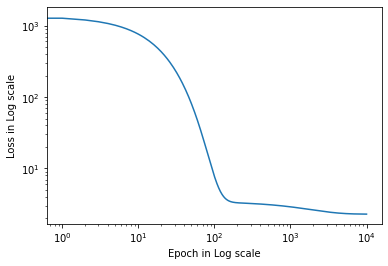

In [115]:
plt.loglog(epoch_graph, loss_graph)
plt.xlabel('Epoch in Log scale')
plt.ylabel('Loss in Log scale')

In [116]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[9.6200]], requires_grad=True)
Parameter containing:
tensor([0.9013], requires_grad=True)


Text(4, 30, '$y=0.9013+9.6200x$')

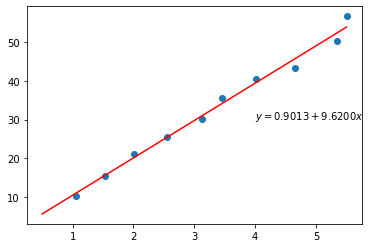

In [117]:
x_range2 = np.linspace(0.5, 5.5, 10)
y_hat2 = model(torch.from_numpy(x_range2).float().unsqueeze(dim=1))
plt.scatter(x, y)
plt.plot(x_range2, y_hat2.detach().numpy(), 'r')
plt.text(4, 30, "$y=0.9013+9.6200x$")